### PEOPLES' FRIENDSHIP UNIVERSITY OF RUSSIA
#### Faculty of Physical, Mathematical and Natural Sciences
#### Department of Information Technology
## Lab Work Report
#### Subject: Mathematical Modeling
##### Student:   Grigory Grechkin
##### Group Number:    NKNbd-01-17
### Moscow 2020
***

# Usage of Chi-squared test

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
N = len(data)
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**It is necessary to check the Chi-squared test for the presence of a relationship between the specified parameters**

*   H0: there is no dependency between the parameters

*   Ha (H3): there is a dependency between the parameters

# Task 1. Parameters 'lunch' and 'reading score'

In [5]:
l = np.array(data['lunch'].values)
rs = np.array(data['reading score'].values)

**Lunch parameter distribution graph**

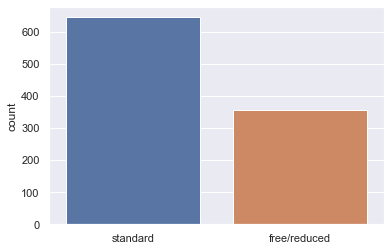

In [6]:
sns.countplot(l)

**Graph of the distribution of the reading score parameter**

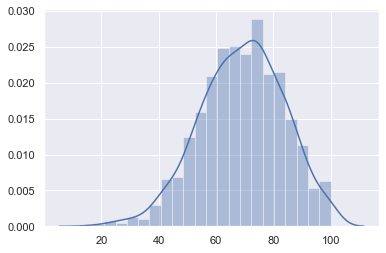

In [7]:
sns.distplot(rs)

**Graph of joint distribution of lunch and reading score parameters**

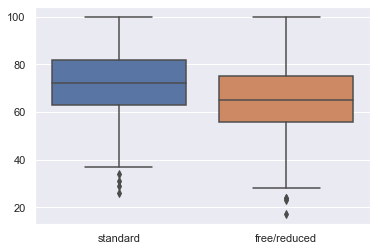

In [8]:
sns.boxplot(l, rs)

**Splitting reading scores into intervals**

In [9]:
z = np.vstack((l, rs))

l1 = np.array([]); l2 = np.array([]); l3 = np.array([]); rs1 = np.array([]); rs2 = np.array([]); rs3 = np.array([]) 

for i in range(N):
    if z[1][i] < 50:
        l1 = np.append(l1, z[0][i])
        rs1 = np.append(rs1, z[1][i])
    elif z[1][i] >= 50 and z[1][i] < 85:
        l2 = np.append(l2, z[0][i])
        rs2 = np.append(rs2, z[1][i])
    else:
        l3 = np.append(l3, z[0][i])
        rs3 = np.append(rs3, z[1][i])

**Conjugacy table**

In [10]:
s1 = np.sum(l1 == 'standard')
s2 = np.sum(l2 == 'standard')
s3 = np.sum(l3 == 'standard')
fr1 = len(l1) - s1
fr2 = len(l2) - s2
fr3 = len(l3) - s3

a = np.array([
    [s1, s2, s3],
    [fr1, fr2, fr3]
])

table1 = pd.DataFrame(a, columns = ['0-49', '50 - 84', '85 - 100'], index = ['standard', 'free/reduced'])
table1

,0-49,50 - 84,85 - 100
standard,39,491,115
free/reduced,51,269,35


**Chi-square statistics value**

In [11]:
def hi_kw(a, n):
    ni = []; nj = []

    # m - число значений lunch
    # k - число значений reading score
    (m, k) = a.shape

    for i in range(m):
        sum = 0
        for j in range(k):
            sum += a[i][j]
        ni.append(sum)

    for j in range(k):
        sum = 0
        for i in range(m):
            sum += a[i][j]
        nj.append(sum)

    hi_kw = 0
    for i in range(m):
        for j in range(k):
            hi_kw += a[i][j]**2 / (ni[i] * nj[j])
    hi_kw -= 1
    hi_kw *= n
    
    return hi_kw


hikw1 = hi_kw(a, N)
hikw1

27.31088010450833

**ρ-value**

In [12]:
(m, k) = a.shape
r = (m - 1) * (k - 1)
pv1 = 1 - stats.chi2.cdf(hikw1, df = r)
print(pv1)
print('H0 верна?', pv1 > 0.05)

1.173593613179591e-06
H0 верна? False


* ρ-value is significantly less than 0.05

There is a dependency between the parameters. **We reject the H0 hypothesis in favor of an alternative one.**

**Kramer's Measure**

In [13]:
C1 = np.sqrt(hikw1 / (N * min(m - 1, k - 1)))
C1

0.16526003783282978

* * Kramer's measure < 0.3

**Conclusion: there is a weak dependence between the parameters**
***

# Task 2. Parameters 'race/ethnicity' and 'writing score'

In [14]:
re = np.array(data['race/ethnicity'].values)
ws = np.array(data['writing score'].values)

**Graph of the distribution of the race/ethnicity parameter**

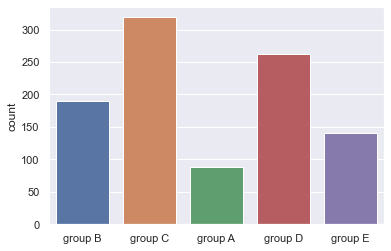

In [15]:
sns.countplot(re)

**Graph of the distribution of the writing score parameter**

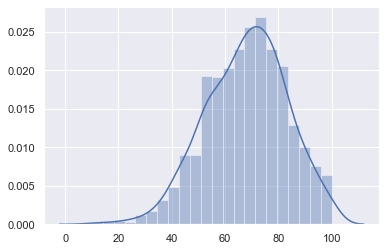

In [16]:
sns.distplot(ws)

**Graph of the joint distribution of race/ethnicity and writing score parameters**

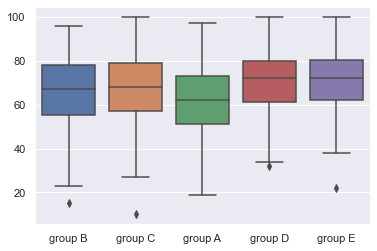

In [17]:
sns.boxplot(re, ws)

**Splitting points for a letter into intervals**

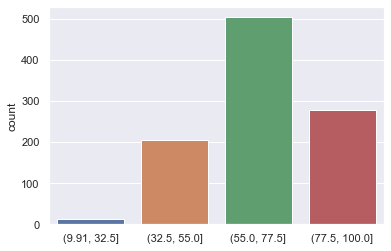

In [18]:
ws_cat = pd.cut(ws, bins = 4)
sns.countplot(ws_cat)

In [19]:
df2 = pd.DataFrame(np.vstack([re, ws_cat]).T, columns = ['re', 'ws'])
df2

,re,ws
0,group B,"(55.0, 77.5]"
1,group C,"(77.5, 100.0]"
2,group B,"(77.5, 100.0]"
3,group A,"(32.5, 55.0]"
4,group C,"(55.0, 77.5]"
...,...,...
995,group E,"(77.5, 100.0]"
996,group C,"(32.5, 55.0]"
997,group C,"(55.0, 77.5]"
998,group D,"(55.0, 77.5]"


**Conjugacy table**

In [20]:
table2 = pd.crosstab(df2['ws'], df2['re'])
b = np.array(table2)
table2

re,group A,group B,group C,group D,group E
ws,,,,,
"(9.91, 32.5]",1,6,3,1,1
"(32.5, 55.0]",30,42,71,41,21
"(55.0, 77.5]",42,93,160,138,71
"(77.5, 100.0]",16,49,85,82,47


**Chi-square statistics value**

In [21]:
hikw2 = hi_kw(b, N)
hikw2

28.21476955336233

**p-value**

In [22]:
(m2, k2) = b.shape
r2 = (m2 - 1) * (k2 - 1)
pv2 = 1 - stats.chi2.cdf(hikw2, df = r2)
print(pv2)
print('H0 верна?', pv2 > 0.05)

0.00514536770378593
H0 верна? False


* p-value less than 0.05

There is a dependency between the parameters. **We reject the H0 hypothesis in favor of an alternative one.**

**Kramer's Measure**

In [23]:
C2 = np.sqrt(hikw2 / (N * min(m2 - 1, k2 - 1)))
C2

0.0969789832100446

* * Kramer's measure < 0.3

**Conclusion: there is a weak dependence between the parameters**
***

# # Task 3. Parameters "math score" and "reading score"

In [24]:
ms = np.array(data['math score'].values)
rs = np.array(data['reading score'].values)

****Distribution graph of the math score parameter**

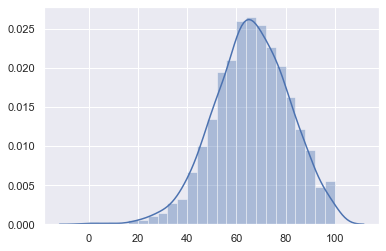

In [25]:
sns.distplot(ms)

**Graph of the distribution of the reading score parameter**

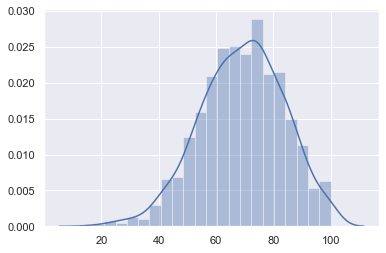

In [26]:
sns.distplot(rs)

**Graph of the joint distribution of math score and reading score parameters**

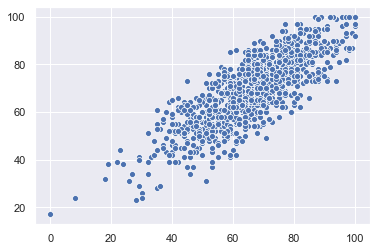

In [27]:
sns.scatterplot(ms, rs)

**Splitting samples into intervals**

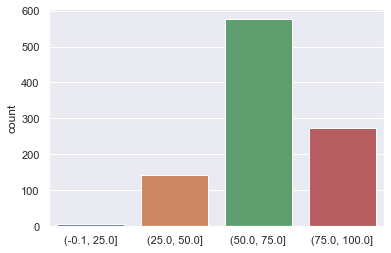

In [28]:
ms_cat = pd.cut(ms, bins = 4)
sns.countplot(ms_cat)

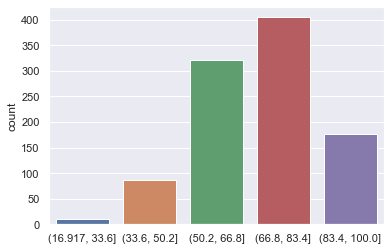

In [29]:
rs_cat = pd.cut(rs, bins = 5)
sns.countplot(rs_cat)

In [30]:
df3 = pd.DataFrame(np.vstack([ws_cat, rs_cat]).T, columns = ['ws', 'rs'])
df3

,ws,rs
0,"(55.0, 77.5]","(66.8, 83.4]"
1,"(77.5, 100.0]","(83.4, 100.0]"
2,"(77.5, 100.0]","(83.4, 100.0]"
3,"(32.5, 55.0]","(50.2, 66.8]"
4,"(55.0, 77.5]","(66.8, 83.4]"
...,...,...
995,"(77.5, 100.0]","(83.4, 100.0]"
996,"(32.5, 55.0]","(50.2, 66.8]"
997,"(55.0, 77.5]","(66.8, 83.4]"
998,"(55.0, 77.5]","(66.8, 83.4]"


**Conjugacy table**

In [31]:
table3 = pd.crosstab(df3['ws'], df3['rs'])
c = np.array(table3)
table3

rs,"(16.917, 33.6]","(33.6, 50.2]","(50.2, 66.8]","(66.8, 83.4]","(83.4, 100.0]"
ws,,,,,
"(9.91, 32.5]",9,3,0,0,0
"(32.5, 55.0]",2,81,122,0,0
"(55.0, 77.5]",0,2,200,295,7
"(77.5, 100.0]",0,0,0,110,169


**Chi-square statistics value**

In [32]:
hikw3 = hi_kw(c, N)
hikw3

1583.9517232323285

**p-value**

In [33]:
(m3, k3) = c.shape
r3 = (m3 - 1) * (k3 - 1)
pv3 = 1 - stats.chi2.cdf(hikw3, df = r3)
print(pv3)
print('H0 верна?', pv3 > 0.05)

0.0
H0 верна? False


* p-value is significantly less than 0.05

There is a dependency between the parameters. **We reject the H0 hypothesis in favor of an alternative one.**

**Kramer's Measure**

In [34]:
C3 = np.sqrt(hikw3 / (N * min(m3 - 1, k3 - 1)))
C3

0.7266250117798791

Kramer's Measure > 0.3

**Conclusion: there is a strong dependence between the parameters**
***